Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 07 in Python
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810
---    

### Exercise 1: Classifying Hand-Written Digits with PyTorch

#### Getting Started

This exercise will give a short introduction into the framework PyTorch (https://pytorch.org/) to build small and large neural networks.

PyTorch is an open-source deep learning framework that’s known for its flexibility and ease-of-use. This is enabled in part by its compatibility with the popular Python high-level programming language favored by machine learning developers and data scientists.

##### What is PyTorch?

PyTorch is a fully featured framework for building deep learning models, which is a type of machine learning that’s commonly used in applications like image recognition and language processing. Written in Python, it’s relatively easy for most machine learning developers to learn and use. PyTorch is distinctive for its excellent support for GPUs and its use of reverse-mode auto-differentiation, which enables computation graphs to be modified on the fly. This makes it a popular choice for fast experimentation and prototyping.

##### Key Benefits of PyTorch

- There’s a large and vibrant community at PyTorch.org community with excellent documentation and tutorials. The forums are active and supportive.
- It’s written in Python and integrated with popular Python libraries like NumPy for scientific computing, SciPy, and Cython for compiling Python to C for better performance. Because its syntax and usage are similar to Python’s, PyTorch is relatively easy for Python developers to learn.
- It supports CPU, GPU, and parallel processing, as well as distributed training. This meana that computational work can be distributed among multiple CPU and GPU cores, and training can be done on multiple GPUs on multiple machines.


__Please install the `torch` and `torchvision` packages, ideally by following the setup guide: (https://pytorch.org/get-started/locally/).__


#### More Information: 
 
You can find many resources on how to get started with PyTorch, both in written form or as videos.
In this exercise, we want to give a brief introduction. You will learn how to:

1. How to create a model. 
2. How to select an optimizer, a loss function and a metric. 
3. How to train the model on data. 
4. How to predict. 

#### Exercise 1:  Build your first small Neural Network 

__In this exercise we will use a Neural Network on a real data set. We will classify the digits dataset (MINST)__

You are allowed to use the following packages only.

In [1]:
import torch
import torchvision

In [2]:
# You can keep the following parameters for training and testing
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.manual_seed(random_seed)

##### __(a) Load the MNIST dataset via the torchvision dataset functionality. Load both the training and test data__
_(Hint: use the `DataLoader` from torch and `datasets.MNIST` class from the torch library, Create a separate dataloader for training and testing.)_

- Use a batch size of 64 for training, and 1000 for testing (You can just the parameters before)
- You can pass a transform the PyTorch dataloaders to perform pre-processing of the data, use `torchvision.transforms.Compose` to chain the processing steps of `torchvision.transforms.ToTensor()`(converting images to PyTorch tensors) and `torchvision.transforms.Normalize((0.1307,), (0.3081,))` (normalize the data with mean and std. of the MNIST dataset)
- Make sure to shuffle the data.

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('C:/Users/linwe/Uni/Data_Mining/datamining/Assignment_07', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('C:/Users/linwe/Uni/Data_Mining/datamining/Assignment_07', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

print("Training data shape:", example_data.shape)
print("Training labels shape:", example_targets.shape)

Training data shape: torch.Size([1000, 1, 28, 28])
Training labels shape: torch.Size([1000])


##### __(b) Quickly describe what the MMNIST dataset is. If you like, you can also visualize samples from the dataset.__

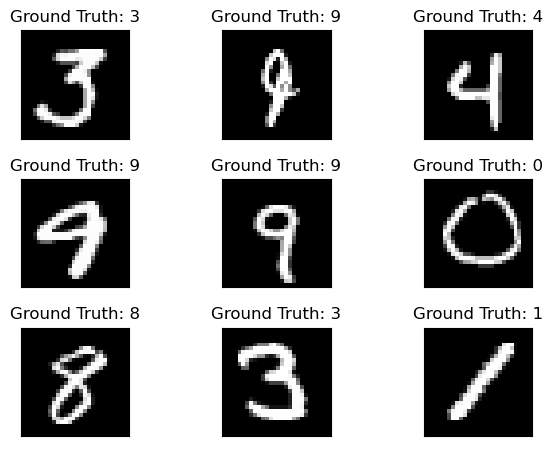

In [4]:
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

##### __(c) Create the neural network to train.__

Create a network with the `torch.nn` package. The package contains many different layers with can be composed into complex neural networks.
- Create a class `Net` that inherits from `nn.Module`.
- Specify the layers you want to use in the `__init__(self)` method of the class.
- Define the `forward(self, x)` to define how the output is computed given the input `x` and layers you specified in the init

You have ***two options*** for your network. Choose either one:

1. Use this given architecture: A CNN network architecture containing the following layers:
- A first `Conv2d` layer with kernel size 5, 10 filters, and stride 2
- A `nn.RELU()` activation layer
- A second `Conv2d` layer with kernel size 5 and 20 filters, and stride 2
- A `nn.RELU()`activation layer
- A first fully connected (`linear`) layer with 320 input neurons and 50 output neurons
- A final `nn.RELU()` activation layer
- A second fully connected layer with 50 input neurons and 10 output neurons (corresponding to the number of classes)
- A softmax layer that turns the network activations into class probabilities

2. Choose and implement your own network architecture. You are completely free in choosing a architecture you build from layers of the `nn` package. As the only condition, your network should achieve a test accuracy of at least 85%.

In [5]:
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

##### __(d) Initialize the network (by calling the empty constructor) and create the optimizer (`optim.SGD`) by passing the network parameters.__

In [6]:
import torch.optim as optim

network = Net()

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

##### __(f) We now train the neural network on the training data set and predict the test data set. For this, we have implemented the train and test functions for you. If you did the previous task correctly, this code should run without errors.__

In this exercise, you task is to understand the given code. Try to ***fill the empty comments marked by `Explanation:`*** in the following code blocks. You can use any online ressources you like as reference:

In [7]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [8]:
import torch.nn.functional as F

def train(epoch): 
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # Explanation: <Here>
        output = network(data)
        loss = F.nll_loss(output, target) # Explanation: <Here>
        loss.backward() # Explanation: <Here>
        optimizer.step() # Explanation: <Here>
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [9]:
def test():
    network.eval() # Explanation: <Here>
    test_loss = 0
    correct = 0
    with torch.no_grad(): # Explanation: <Here>
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # Explanation: <Here>
            pred = output.data.max(1, keepdim=True)[1] # Explanation: <Here>
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

##### __(g) Run training and testing and describe the output.__

In [10]:
# Your implementation should be compatible with the following code
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/var/folders/bc/wj9fb4sn72x23376jk6n_b5w0000gn/T/ipykernel_3363/3678897053.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/linweicheng/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313179
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300776
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298872
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276723
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241102
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.189547
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.146399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.107701
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.011356
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.843857
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.758839
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.672644
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.687645
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.426628
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.284204
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.318824
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.445287
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.140686
Train Epoch: 1 [12160/6

##### __(g) We have saved traning statistics in the train_losses/test_losses lists. Plot the training and test accuracy values during training. You can use any plotting library, e.g. matplotlib or seaborn.__

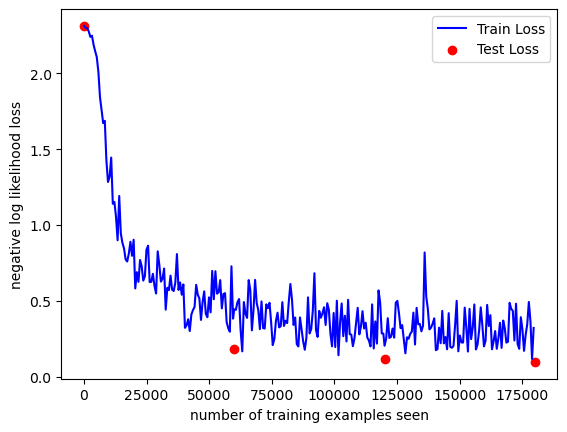

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

***Interpret the results***

Answer here

```
Train Loss (Blue Line): As the number of training examples seen increases, the training loss gradually decreases. A decreasing training loss indicates that the model is learning to fit the training data better.

Test Loss (Red Dots): The test loss reflects how well the model generalizes to new data, and observing a decreasing or stable test loss is an indication of good generalization.

> Both the training and test losses decrease and converge to a stable value, which indicates that the model is learning the patterns in the data without overfitting.
```

#### Exercise 2: Use all the transformers

As we learned in the lecture, nowadays, transformers are the way to go.    
Large language models such as GPT2 and GPT3 are currently state-of-the-art for a lot of natural language processing.  
Now, we want to look at how hard or easy it is to work with these models.  
So, we start with a smaller model, the [GPT2 model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), and use it for some text generation using the hugging face (https://huggingface.co/) [packaging](https://huggingface.co/docs/transformers/model_doc/gpt2).

__Please install the `transformers` packages, ideally by following the setup guide: (https://huggingface.co/docs/transformers/installation).__


##### __a) Load the `gpt2` (https://huggingface.co/gpt2) model from the `transformers` package and generate some follow up to 'Hi, I am a transformer, I can'.__

In [12]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

input_text = "Hi, I am a transformer, I can"

input_ids = tokenizer.encode(input_text, return_tensors='pt')
attention_mask = torch.ones_like(input_ids)

output = model.generate(
    input_ids,
    max_length=100,
    num_return_sequences=1,
    no_repeat_ngram_size=2,
    top_k=50,
    top_p=0.95,
    pad_token_id=tokenizer.eos_token_id,  
    attention_mask=attention_mask,
    do_sample=True
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

max_words_per_line = 120
lines = [generated_text[i:i + max_words_per_line] for i in range(0, len(generated_text), max_words_per_line)]
for line in lines:
    print(line)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hi, I am a transformer, I can't use a switch, that just isn't practical.

Tired of having a few switches, the big guys n
eed to be able to just hook it all into one switch. I'm sure there is some benefit there as well, you know you're going 
to have to do that though. There is actually a nice and fast switch that I use from a time ago that only requires one wi
re but it is kind of slow to connect and takes quite


##### __b) Use your previous code and change the `temperature`. Which changes do you see?__
_(Hint: use the `temperature` keyword parameter in the `generator` to achieve this.)_

In [13]:
temperature_values = [0.2, 0.5, 1.0, 1.5]

for temperature in temperature_values:
    output = model.generate(
        input_ids,
        max_length=100,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id,
        attention_mask=attention_mask,
        temperature=temperature,
        do_sample=True
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print(f"Generated text (temperature={temperature}):")
    
    max_words_per_line = 120
    lines = [generated_text[i:i + max_words_per_line] for i in range(0, len(generated_text), max_words_per_line)]
    for line in lines:
        print(line)
        
    print("-"*120)

Generated text (temperature=0.2):
Hi, I am a transformer, I can't be bothered to do anything else. I have a few things to say about it, but I'm not going 
to go into it.

I have been working on this for a while now, and I think it's time to get it out there. It's a very simp
le project, with a simple idea, a little bit of a twist. And I've been trying to figure out how to make it work. So, it 
is a
------------------------------------------------------------------------------------------------------------------------
Generated text (temperature=0.5):
Hi, I am a transformer, I can't stand the heat. I love it!

I have a very small, but very good, transformer. It is a lit
tle too big, and I have to put it in the back of the car to get it to work.
-I can stand it. -I love the sound. The soun
d is very nice. You can hear it from a distance, it's very well made. And it is easy to use. If you don
-------------------------------------------------------------------------------------------------

```
> Low temperature(0.2) produces more focused and detailed text, moderate temperature(0.5) balances creativity and coherence, high temperature(1.0) introduces more randomness and creativity, and very high temperature(1.5) may result in extremely short and abstract outputs.
```

***<span style="color:orange">Feedback: </span>***
 - 

***<span style="color:green">Well done. Grade: Green</span>***